In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv


In [2]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

#importing librabies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#setting matplotlib inline plotting
%matplotlib inline

#setting visualization style
sns.set_theme(style='whitegrid')

In [3]:
#Loadind data
df = pd.read_csv('/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv')

#First look on data
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [4]:
#Basic statistics about the data
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [5]:
df.info() #as we can see there is no missing values and dataset doesn`t require cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [6]:
#in case we need to check for missing values in each column
df.isna().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

# **Exploratory Data Analysis**
This section contains various visualization of data in Netflix Customer Churn dataset.
We will start with correlation heatmap of numerical variables.

Text(0.5, 1.0, 'Correlation heatmap of numeric variables')

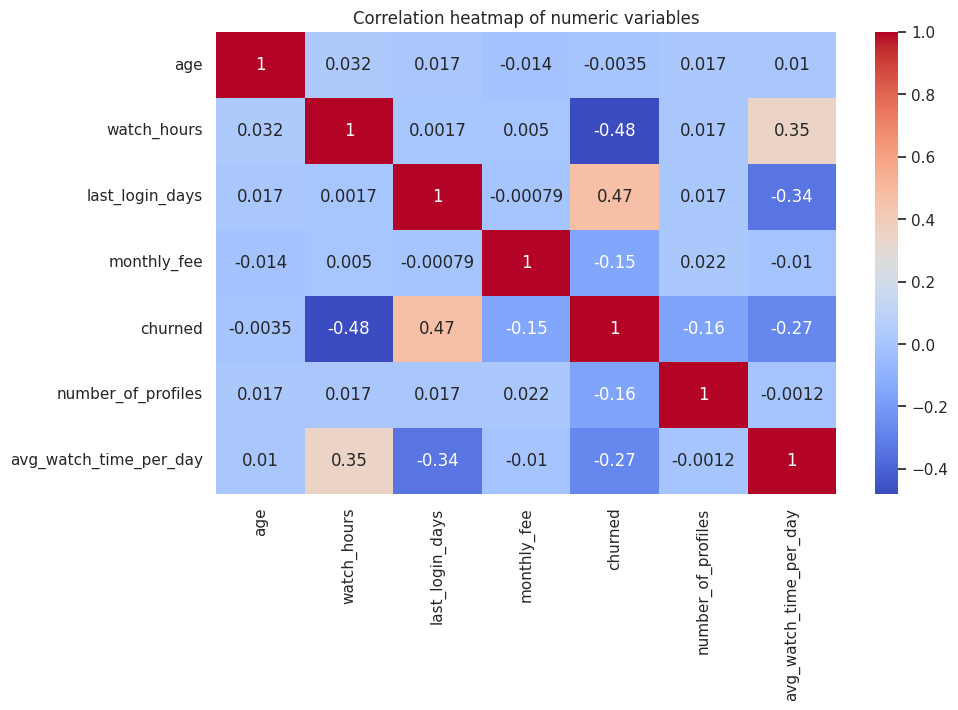

In [7]:
#selecting columns with numerical data
numerical_df = df[['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned', 'number_of_profiles', 'avg_watch_time_per_day']]
#creating correlation dataframe with pairwise correlation of columns in numerical_df
correlation_df = numerical_df.corr()

#plotting
plt.figure(figsize=(10,6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of numeric variables')

As we can see there is couple of variables that are negatively correlating with *churned* variable, such as : *avg_watch_time_per_day*, *watch_hours*, *number_of_profiles*. As we know variable *churned* presented in a way of being 1 or 0 - churned or Not_churned.
It is expected that *watch_hours*, *avg_watch_time_per_day* and *number_of_profiles* will negatively correlate with *churned*, as the most active users tend to stay with a product for a longer period of time.
*last_login_days* have considerably strong correlation with churned status. All these variables need to studied more in order to find out why and who giving up using a product.

Text(0.5, 1.0, 'Favorite genre distribution')

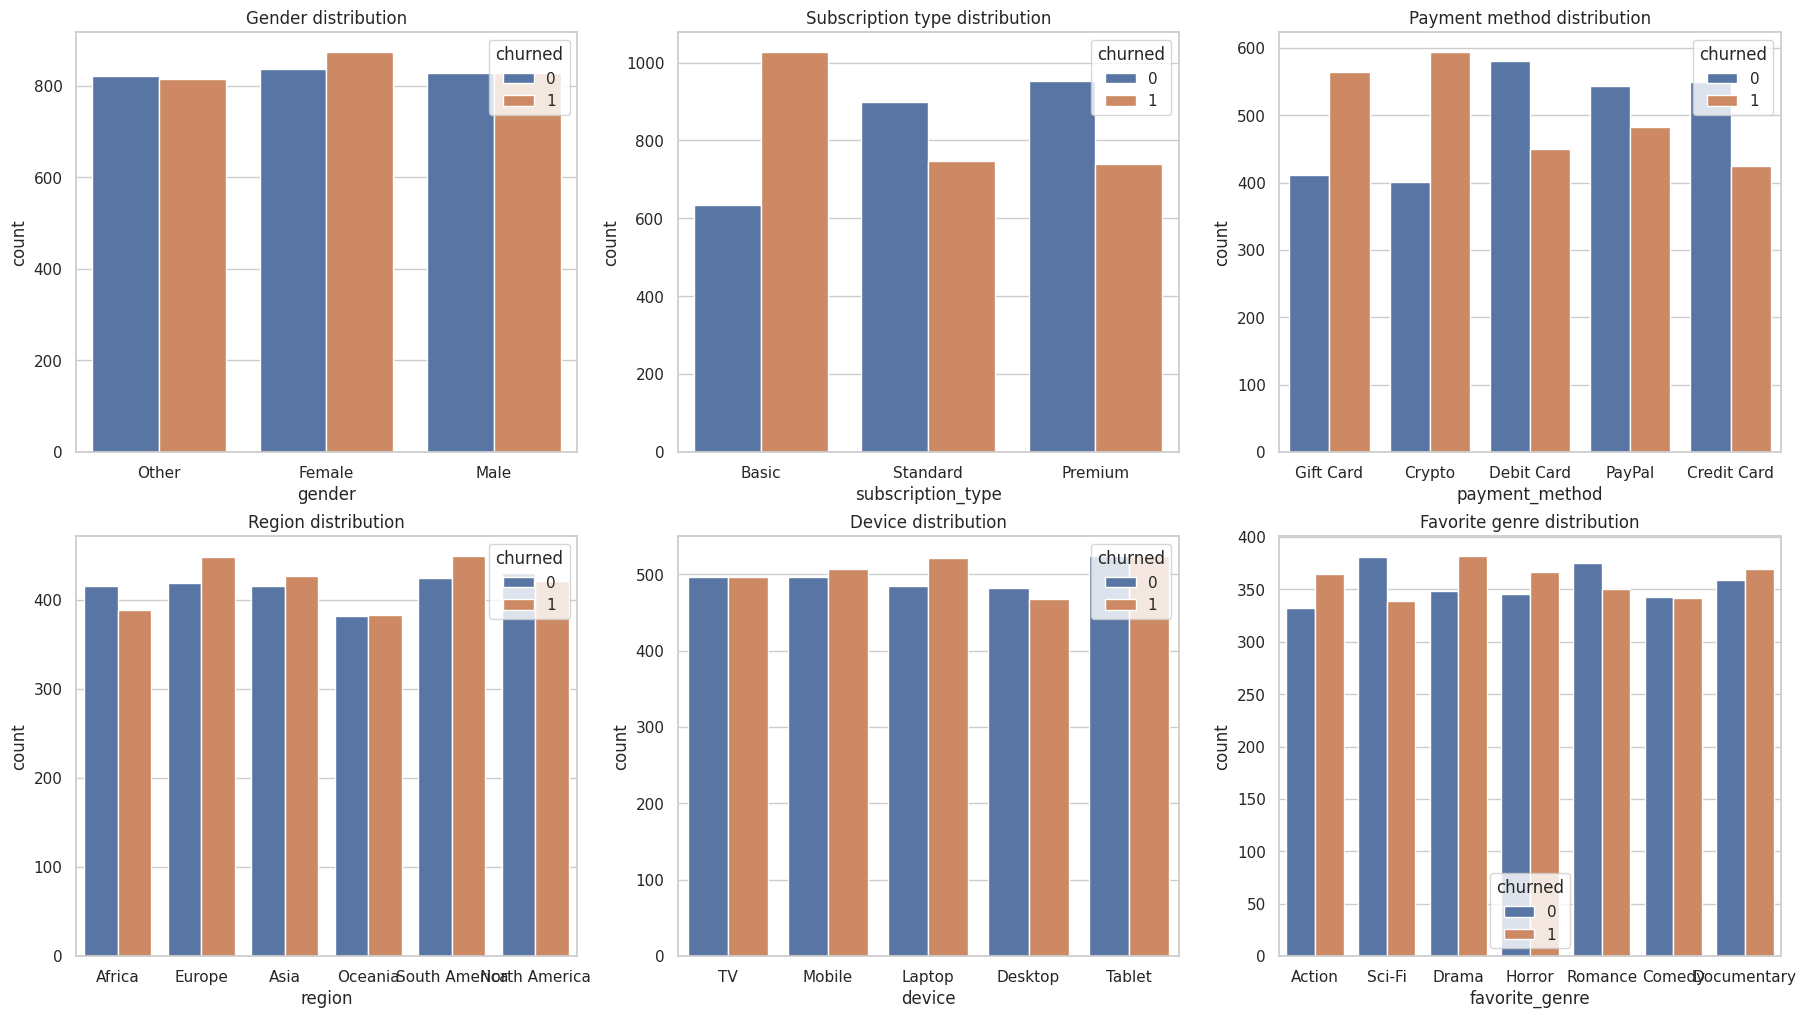

In [8]:
#Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(22, 12))

#gender distribution
sns.countplot(data=df, x='gender', hue='churned', ax=axes[0,0])
axes[0,0].set_title('Gender distribution')

#subscription_type distribution
sns.countplot(data=df, x='subscription_type', hue='churned', ax=axes[0,1])
axes[0,1].set_title('Subscription type distribution')

#payment_method distribution
sns.countplot(data=df, x='payment_method', hue='churned', ax=axes[0,2])
axes[0,2].set_title('Payment method distribution')

#region distribution
sns.countplot(data=df, x='region', hue='churned', ax=axes[1,0])
axes[1,0].set_title('Region distribution')

#device distribution
sns.countplot(data=df, x='device', hue='churned', ax=axes[1,1])
axes[1,1].set_title('Device distribution')

#favorite_genre
sns.countplot(data=df, x='favorite_genre', hue='churned', ax=axes[1,2])
axes[1,2].set_title('Favorite genre distribution')

As we can see churned status differs from one subscription type to another, as well as for different payment method. Any other variable don't show much insight.

Text(0.5, 1.0, 'Other: Churn Count by Subscription Type')

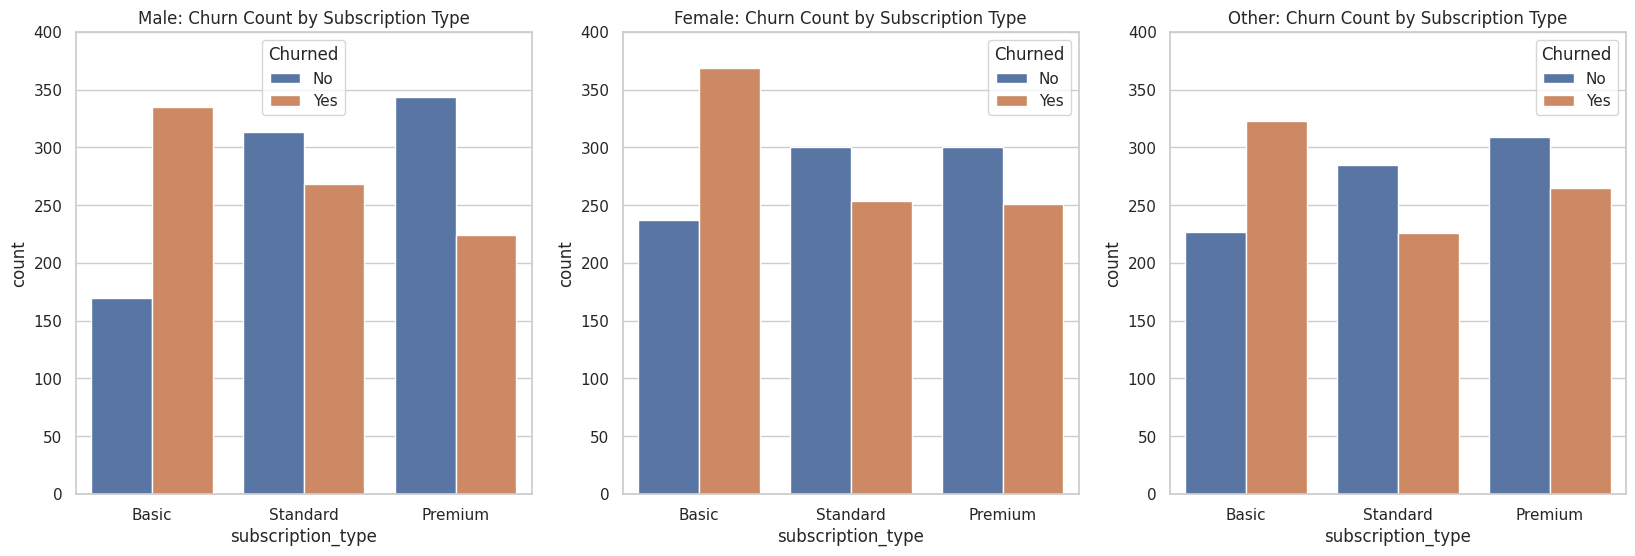

In [9]:
#Churn Count per Subscription type across gender
fig, axes = plt.subplots(1, 3, figsize=(20,6))

order=['Basic', 'Standard', 'Premium']

sns.countplot(data=df[df['gender']=='Male'], x='subscription_type', hue='churned', order=order, ax=axes[0])
axes[0].set_ylim(0, 400)
axes[0].legend(title='Churned',labels=['No', 'Yes'])
axes[0].set_title('Male: Churn Count by Subscription Type')

sns.countplot(data=df[df['gender']=='Female'], x='subscription_type', hue='churned', order=order, ax=axes[1])
axes[1].set_ylim(0, 400)
axes[1].legend(title='Churned',labels=['No', 'Yes'])
axes[1].set_title('Female: Churn Count by Subscription Type')

sns.countplot(data=df[df['gender']=='Other'], x='subscription_type', hue='churned', order=order, ax=axes[2])
axes[2].set_ylim(0, 400)
axes[2].legend(title='Churned',labels=['No', 'Yes'])
axes[2].set_title('Other: Churn Count by Subscription Type')

As we can see churned rate of users with basic subscription is much bigger than some with different subscription type (standard and premium). Another valid point is that male audience shows noticeably smaller churn rate with premium subscription in comparison with others.

Text(0.5, 1.0, 'Other: Churn Count per Payment Method')

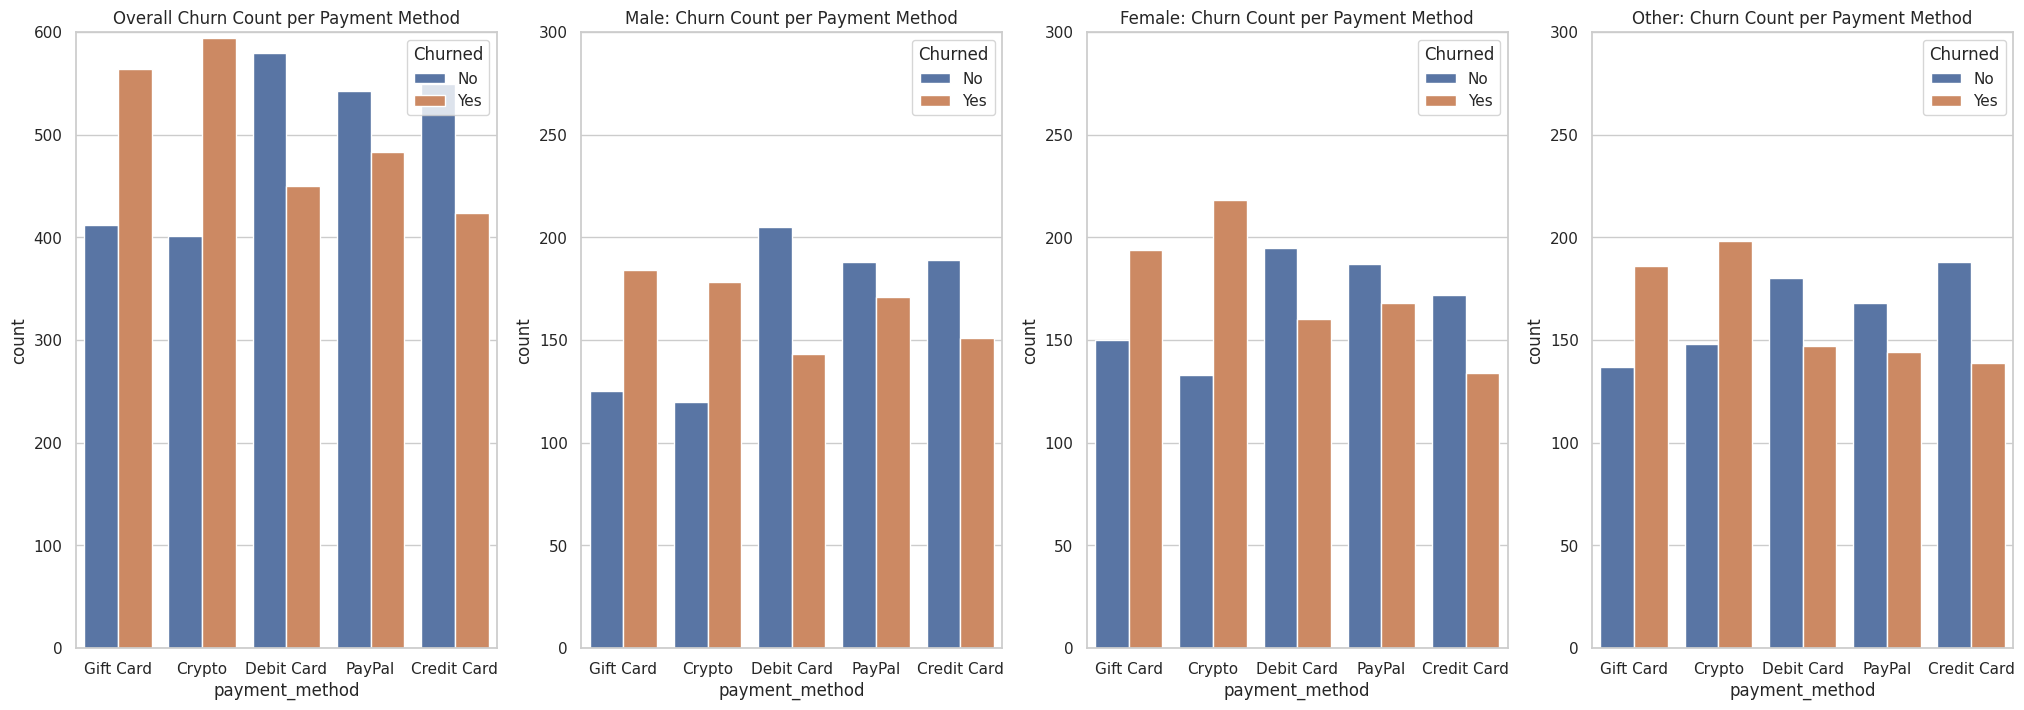

In [10]:
#Churn count per payment method across gender
fig, axes = plt.subplots(1, 4, figsize=(25,8))
order = ['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card']

sns.countplot(data=df, x='payment_method', hue='churned', ax=axes[0], order=order)
axes[0].set_ylim(0, 600)
axes[0].legend(title='Churned',labels=['No', 'Yes'])
axes[0].set_title('Overall Churn Count per Payment Method')

sns.countplot(data=df[df['gender']=='Male'], x='payment_method', hue='churned', ax=axes[1], order=order)
axes[1].set_ylim(0, 300)
axes[1].legend(title='Churned',labels=['No', 'Yes'])
axes[1].set_title('Male: Churn Count per Payment Method')

sns.countplot(data=df[df['gender']=='Female'], x='payment_method', hue='churned', ax=axes[2], order=order)
axes[2].set_ylim(0, 300)
axes[2].legend(title='Churned',labels=['No', 'Yes'])
axes[2].set_title('Female: Churn Count per Payment Method')

sns.countplot(data=df[df['gender']=='Other'], x='payment_method', hue='churned', ax=axes[3], order=order)
axes[3].set_ylim(0, 300)
axes[3].legend(title='Churned',labels=['No', 'Yes'])
axes[3].set_title('Other: Churn Count per Payment Method')



'Gift Card' and 'Crypto' shows the highest churn rate. Worth to mention that 'Crypto' method shows the highest churn ratio in comparison with 'Male' and 'Other' gender groups. As well as 'Debit Card' method works the best way with male audience as it shows the lowest churn ratio. But overall it is not a major differences between gender groups.

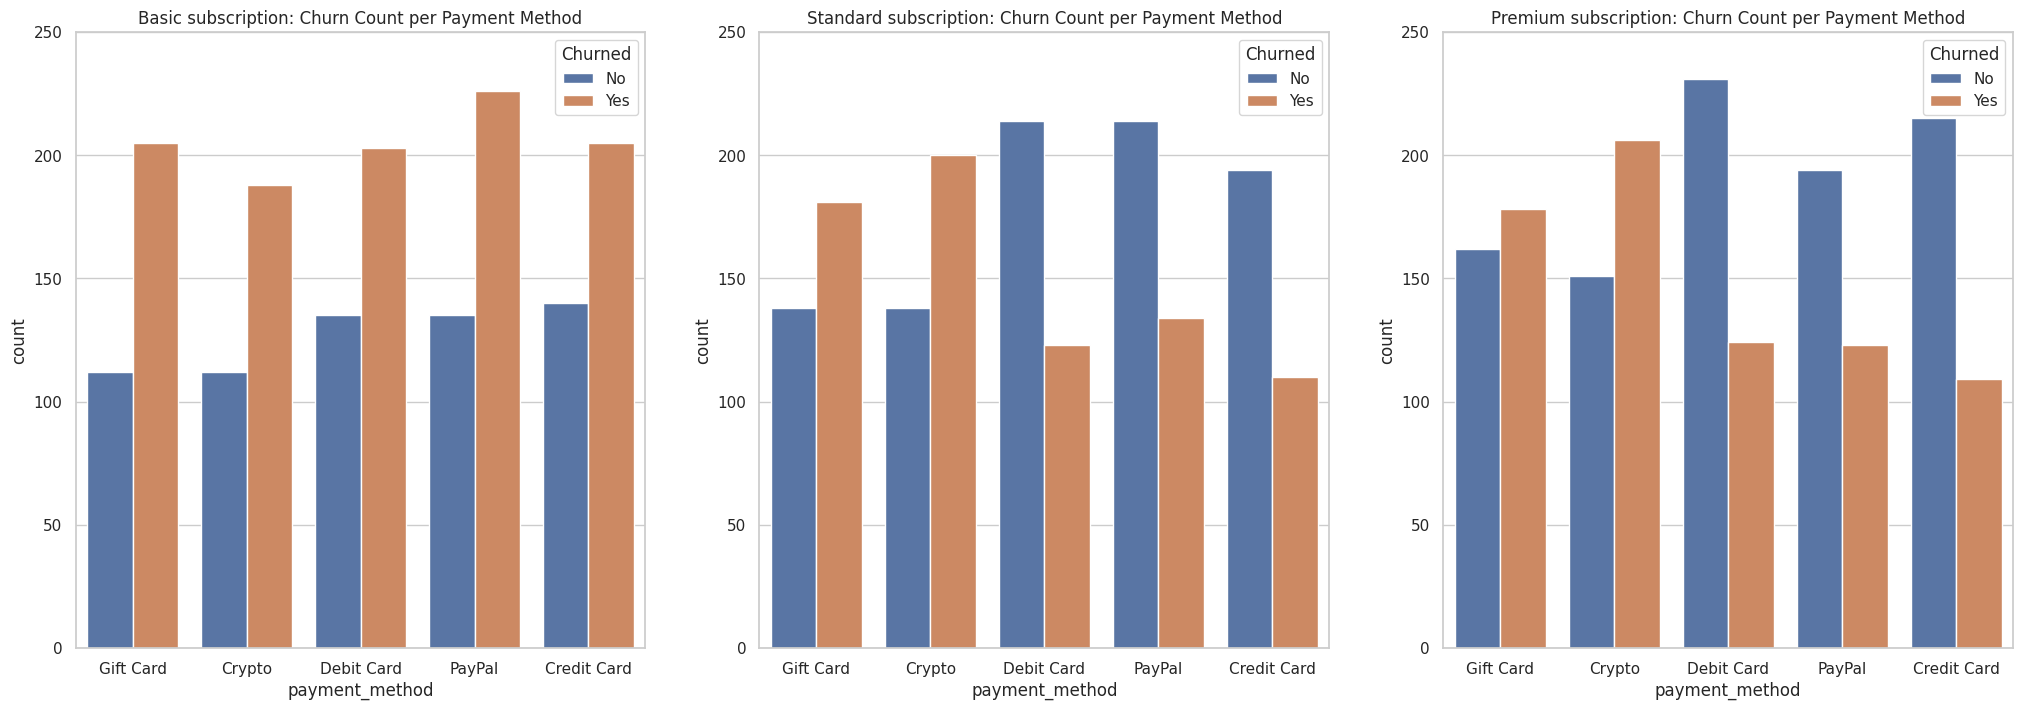

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

order = ['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card']

sns.countplot(data=df[df['subscription_type'] == 'Basic'], x='payment_method', hue='churned', ax=axes[0], order=order)
axes[0].set_ylim(0, 250)
axes[0].set_title('Basic subscription: Churn Count per Payment Method')
axes[0].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(data=df[df['subscription_type'] == 'Standard'], x='payment_method', hue='churned', ax=axes[1], order=order)
axes[1].set_ylim(0, 250)
axes[1].set_title('Standard subscription: Churn Count per Payment Method')
axes[1].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(data=df[df['subscription_type'] == 'Premium'], x='payment_method', hue='churned', ax=axes[2], order=order)
axes[2].set_ylim(0, 250)
axes[2].set_title('Premium subscription: Churn Count per Payment Method')
axes[2].legend(title='Churned',labels=['No', 'Yes'])

These plots tell us that audience with 'Basic' subscription have the highest churn rate overall, across all payment methods. Considering previous plots where payment methods 'Gift Card' and 'Crypto' had high churn rate, now we can say that users with 'Basic' subscription' were the major contributors.

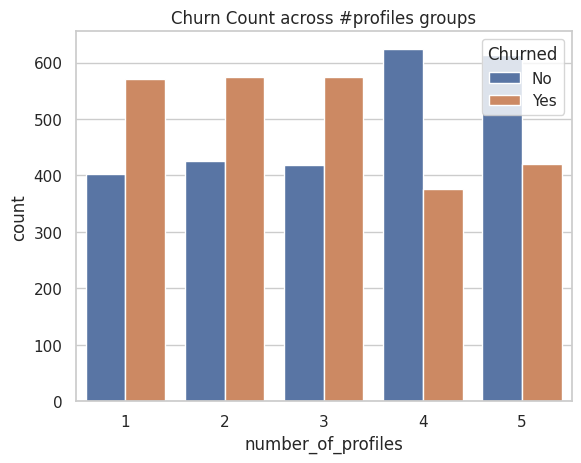

In [12]:
sns.countplot(data=df, x='number_of_profiles', hue='churned')
plt.title('Churn Count across #profiles groups')
plt.legend(title='Churned',labels=['No', 'Yes'])

Users with 1, 2 or 3 profiles shows much greater churn rate in comparison to others with 4 or 5 profiles.

# Looking closer at numeric variables
In this section we will look closer to such variables: *avg_watch_time_per_day, watch_hours, number_of_profiles, last_login_days*.


Text(0.5, 1.0, 'Distribution: last_login_days')

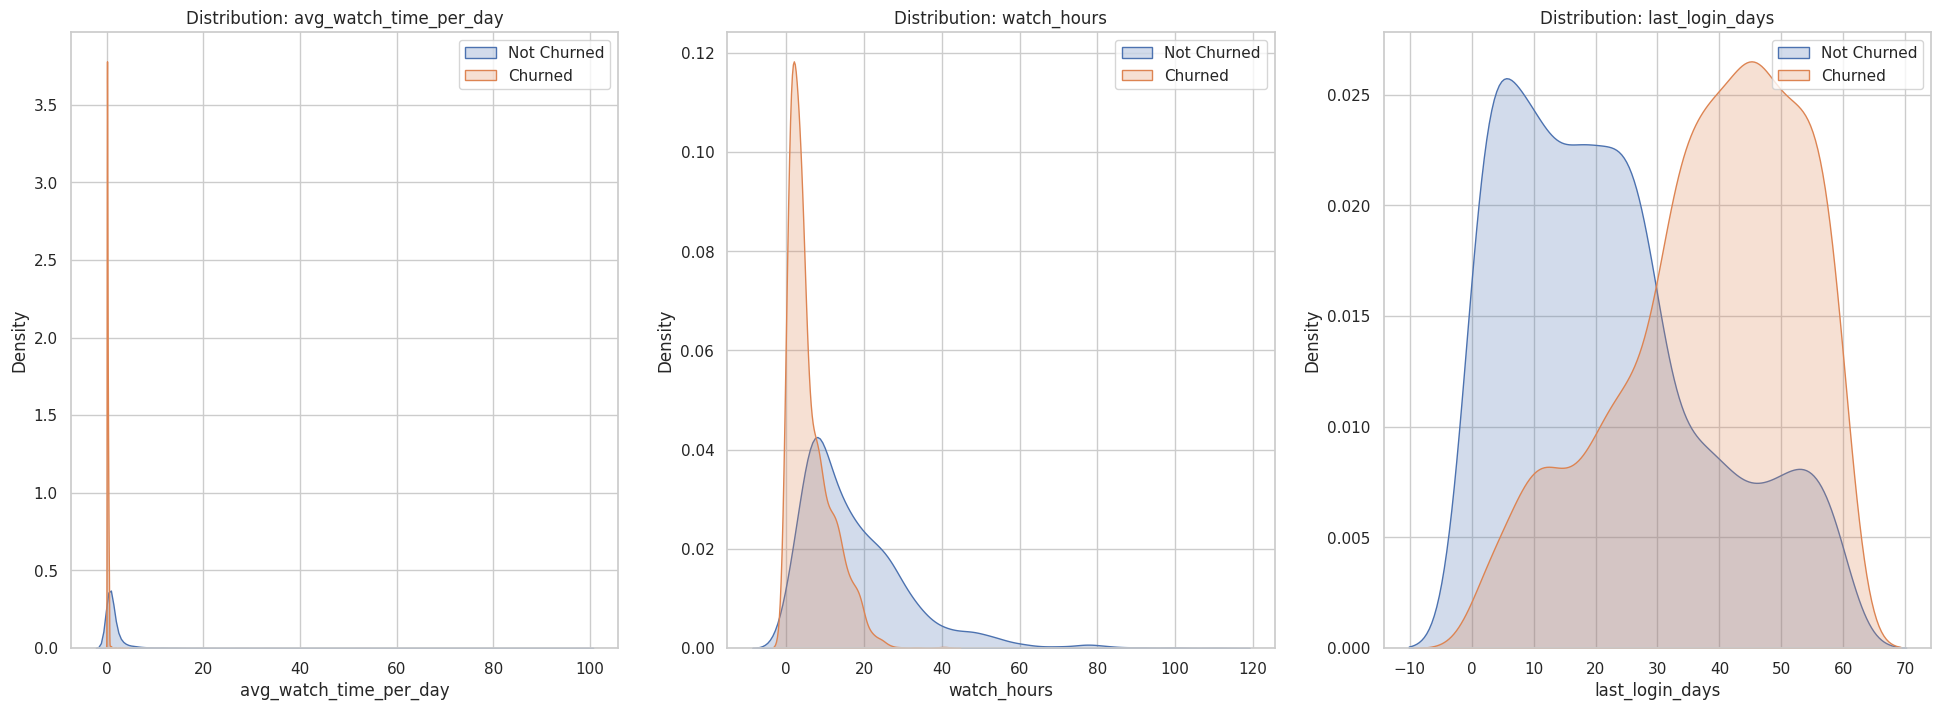

In [13]:
#At first let's look at their distribution.
fig, axes = plt.subplots(1,3, figsize=(24,8))

sns.kdeplot(data=df[df['churned']==0], x='avg_watch_time_per_day', fill=True, label='Not Churned', ax=axes[0])
sns.kdeplot(data=df[df['churned']==1], x='avg_watch_time_per_day', fill=True, label='Churned',ax=axes[0])
axes[0].legend()
axes[0].set_title('Distribution: avg_watch_time_per_day')

sns.kdeplot(data=df[df['churned']==0], x='watch_hours', fill=True, label='Not Churned', ax=axes[1])
sns.kdeplot(data=df[df['churned']==1], x='watch_hours', fill=True, label='Churned',ax=axes[1])
axes[1].legend()
axes[1].set_title('Distribution: watch_hours')

sns.kdeplot(data=df[df['churned']==0], x='last_login_days', fill=True, label='Not Churned', ax=axes[2])
sns.kdeplot(data=df[df['churned']==1], x='last_login_days', fill=True, label='Churned',ax=axes[2])
axes[2].legend()
axes[2].set_title('Distribution: last_login_days')


In [14]:
avg_watch_df = df.groupby('churned').agg({'avg_watch_time_per_day':['mean', 'median', 'max', 'std']})
avg_watch_df

avg_watch_time_per_day                        
                          mean median    max       std
churned                                               
0                     1.594133   0.72  98.42  3.570493
1                     0.164048   0.12   4.32  0.186164

In [15]:
watch_hours_df = df.groupby('churned').agg({'watch_hours':['mean', 'median', 'max', 'std']})
watch_hours_df

watch_hours                          
               mean median     max        std
churned                                      
0         17.449590  13.86  110.40  13.923952
1          5.918497   4.06   41.33   5.418978

In [16]:
last_login_df = df.groupby('churned').agg({'last_login_days':['mean', 'median', 'max', 'std']})
last_login_df

last_login_days                      
                   mean median max        std
churned                                      
0             21.771026   19.0  60  16.155030
1             38.309344   41.0  60  14.751904

****Considering plots and simple statistics above we can make some assumptions about variables and theirs distrirution. 
* *avg_watch_time_per_day* - Not normal, right-skewed with extreme peak near zero. For 'churned' users with low standard deviation and low maximum value as it tells that almost all these users barely used a product before leaving. 'Non churned' users spend more time on average, we can see a right-skewed distribution as most loyal users spend much more time using product comparing to others.
* *watch_hours* - Not normal, right-skewed with strong peak near start. 'Non churned' users showing much greater mean with long tail to the right.
* *last_login_days* - Not normal distribution with two peaks for each 'churned' and 'non churned' group.

Text(0.5, 1.0, 'Boxplot last_login_days vs churned')

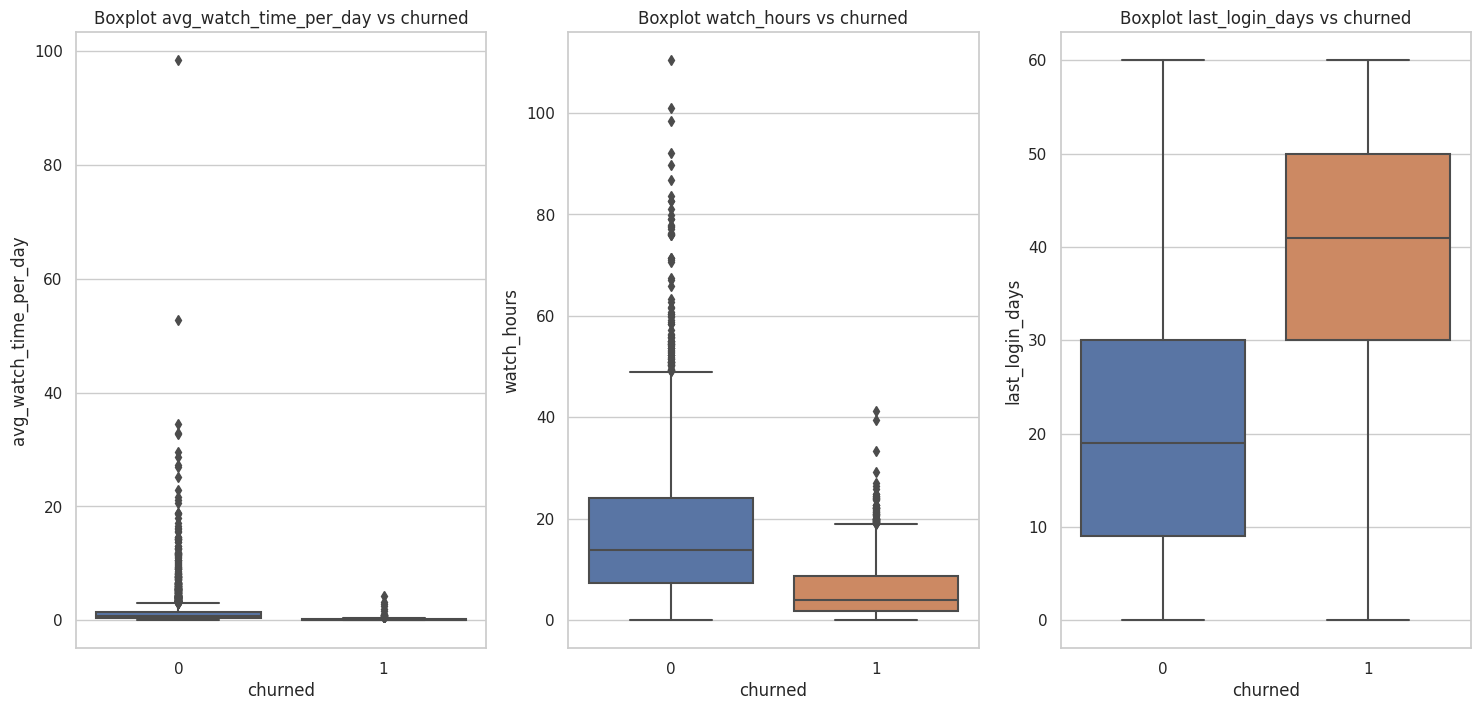

In [17]:
fig,axes = plt.subplots(1,3, figsize=(18,8))


sns.boxplot(data=df, x='churned', y='avg_watch_time_per_day', ax=axes[0])
axes[0].set_title('Boxplot avg_watch_time_per_day vs churned')

sns.boxplot(data=df, x='churned', y='watch_hours', ax=axes[1])
axes[1].set_title('Boxplot watch_hours vs churned')

sns.boxplot(data=df, x='churned', y='last_login_days', ax=axes[2])
axes[2].set_title('Boxplot last_login_days vs churned')

*  *avg_watch_time_per_day* - Majority of values located near 0. There is a lot of outliers for 'non churned' users, average watch time for 'non churned' users is greater than for 'churned'.
*  *watch_hours* - median watch hours for 'non churned' users is significantly greater than for 'churned' with heavy outliers for 'non churned', tells us about that higher watching hours keep users engaged and active.
*  *last_login_days* - 'churned' users have much higher median than 'non churned' users. It indicates that higher login days may be an early warning about future churn.

# Conclusion
Estimating the results of EDA:
* Variables *avg_watch_time_per_day*, *watch_hours*, *last_login_days*, *subscription_type*, *payment_method*, *number_of_profiles* clearly having the biggest impact on churned status. Any undesirable value of each of this metrics or theirs combination can be an early warning about users future decision to leave the product. In order to be able to differentiate the most contributing variables into churn status we need to use ML techniques.
* In order to lower overall churn rate, we need to focus on engaging users to hold previously mentioned metrics on desired level.

# Recomendations
Reconstruct personalized recommendation algorithm to improve users engagement and enlarge watching hours.
Make/improve notification system. Send personalized notification about watched-like content or about new seasons/series of previously watched content.
Encourage users with basic subscription to take next-level subscription: give 1-month/week premium trial, give additional profile for a month.